In [34]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")


In [77]:
# sp500, dow, nasdaq, rus2000
indexes = ["spy", "dia", "qqq", "iwm"]
indexes_day = {}

for index in indexes:
    data = yf.download(index, period="20y", interval="1d", progress=False)
    data["day"] = data.index.day
    data["month"] = data.index.month
    data["year"] = data.index.year
    data["pnl"] = data.Close.pct_change() * 100

    indexes_day[index] = data


In [78]:
indexes_half_month = {}
for idx, data in indexes_day.items():
    data["half_month"] = np.where(data["day"] <= 15, 1, 2)

    group_half_month = data.groupby(["year", "month", "half_month"]).agg({
        "Open": "first",
        "High": "max",
        "Low": "min",
        "Close": "last",
        "Volume": "sum"
    }).reset_index()

    group_half_month["pnl"] = group_half_month.Close.pct_change() * 100

    indexes_half_month[idx] = group_half_month

# 1st/2nd half month returns

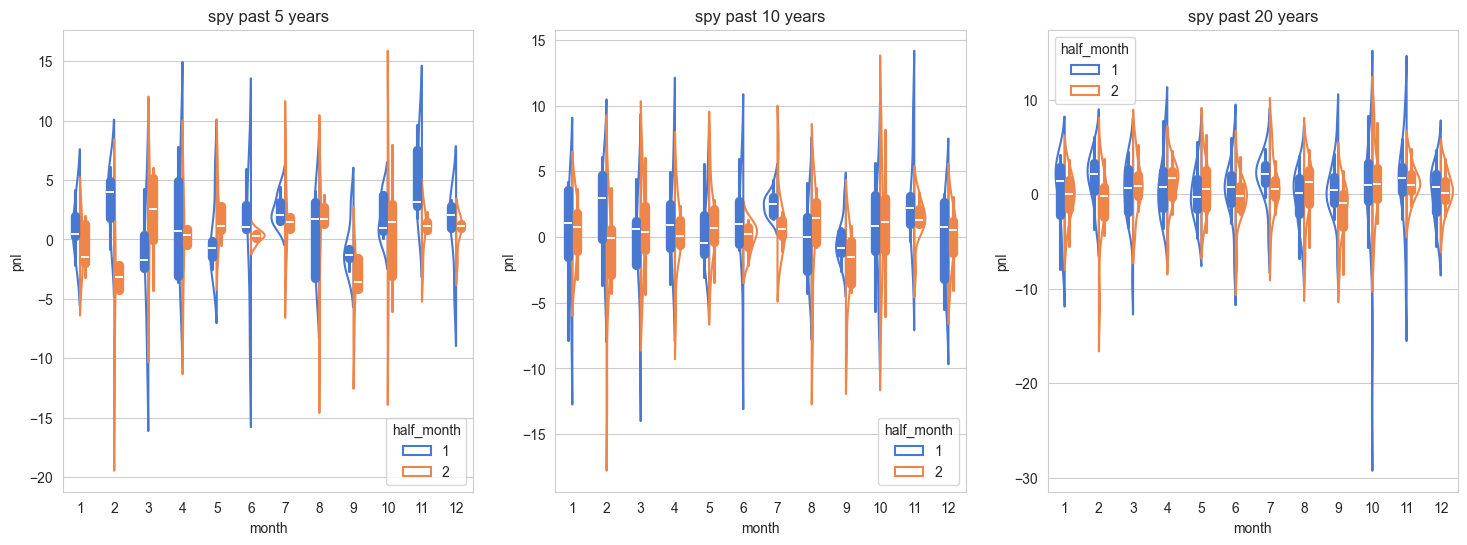

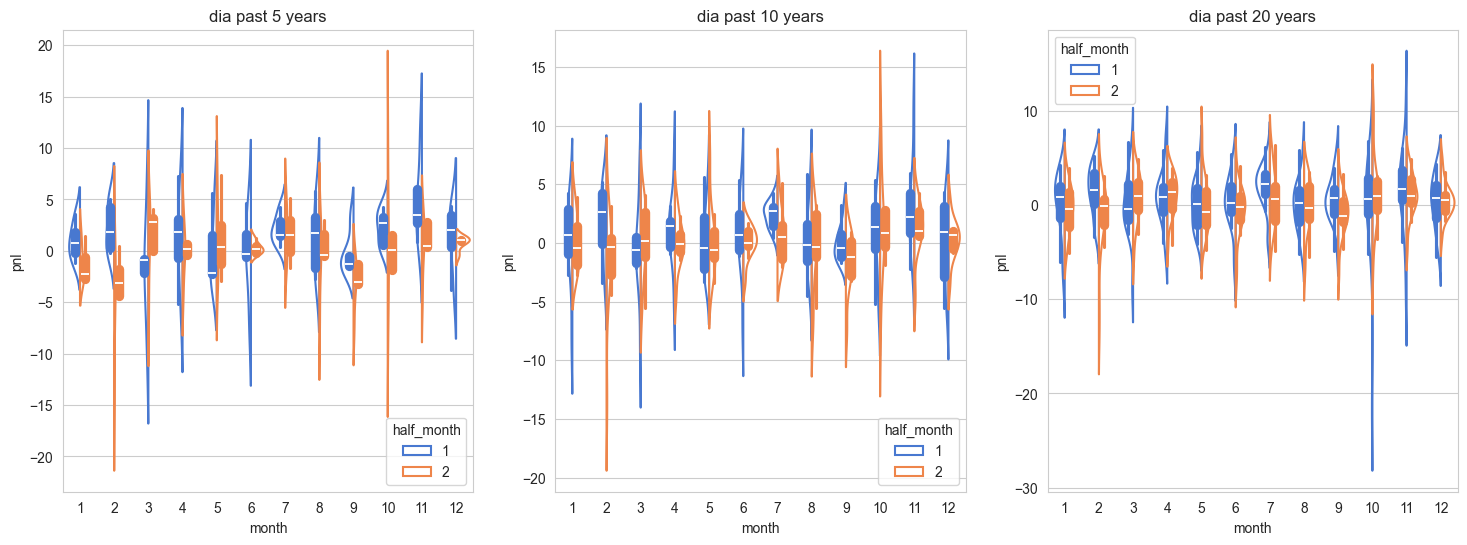

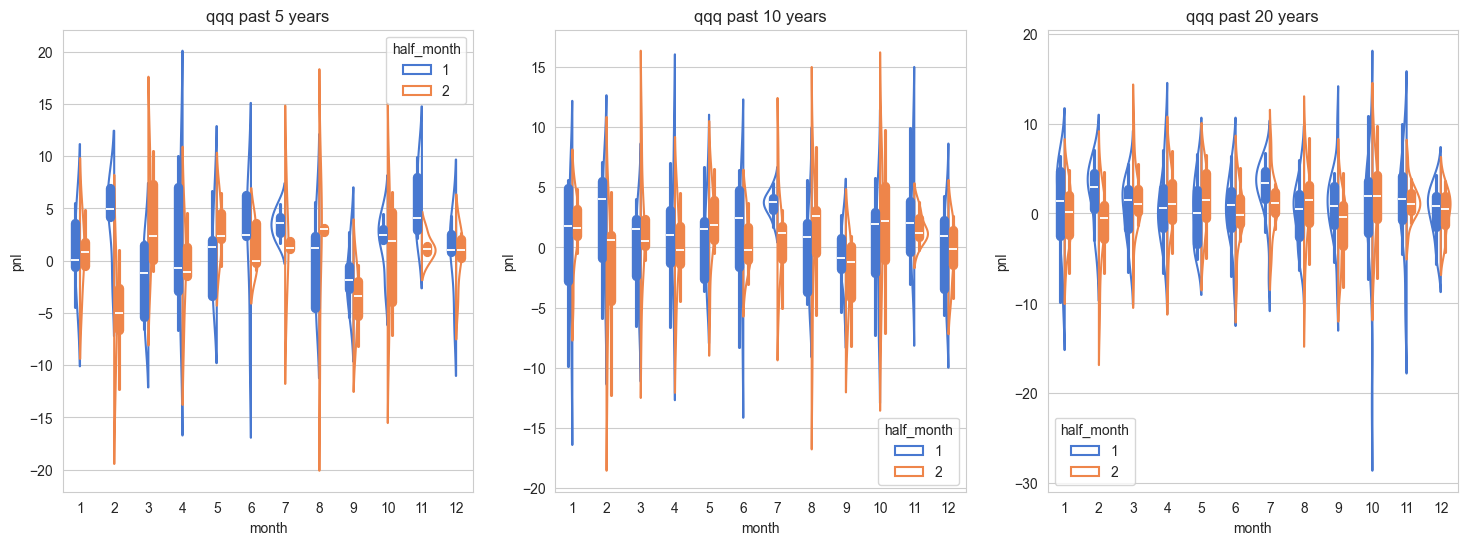

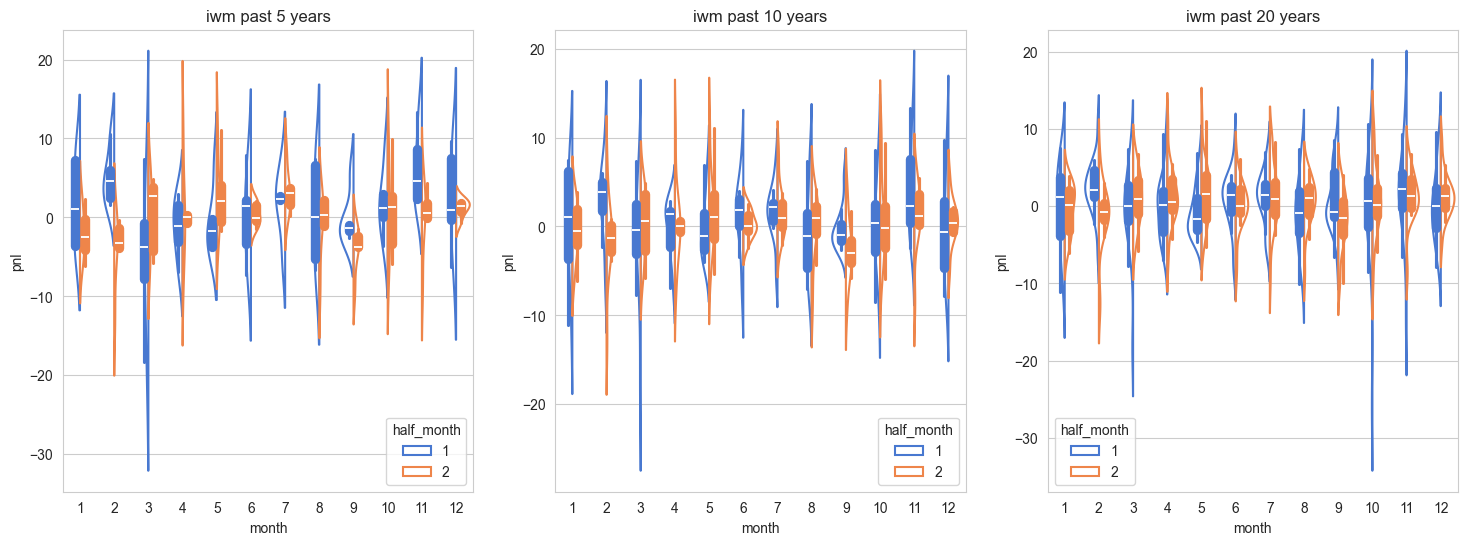

In [89]:
years = [5, 10, 20]

for idx, data in indexes_half_month.items():
    fig, axes = plt.subplots(1, len(years), figsize=(18, 6))
    for i, year in enumerate(years):
        sns.violinplot(ax=axes[i], 
                       data=data[-24 * year:], 
                       x="month", y="pnl", 
                       hue="half_month",
                       split=True,
                       fill=False,
                       palette="muted")
        axes[i].set_title(f"{idx} past {year} years")
    plt.show()

# monthly returns

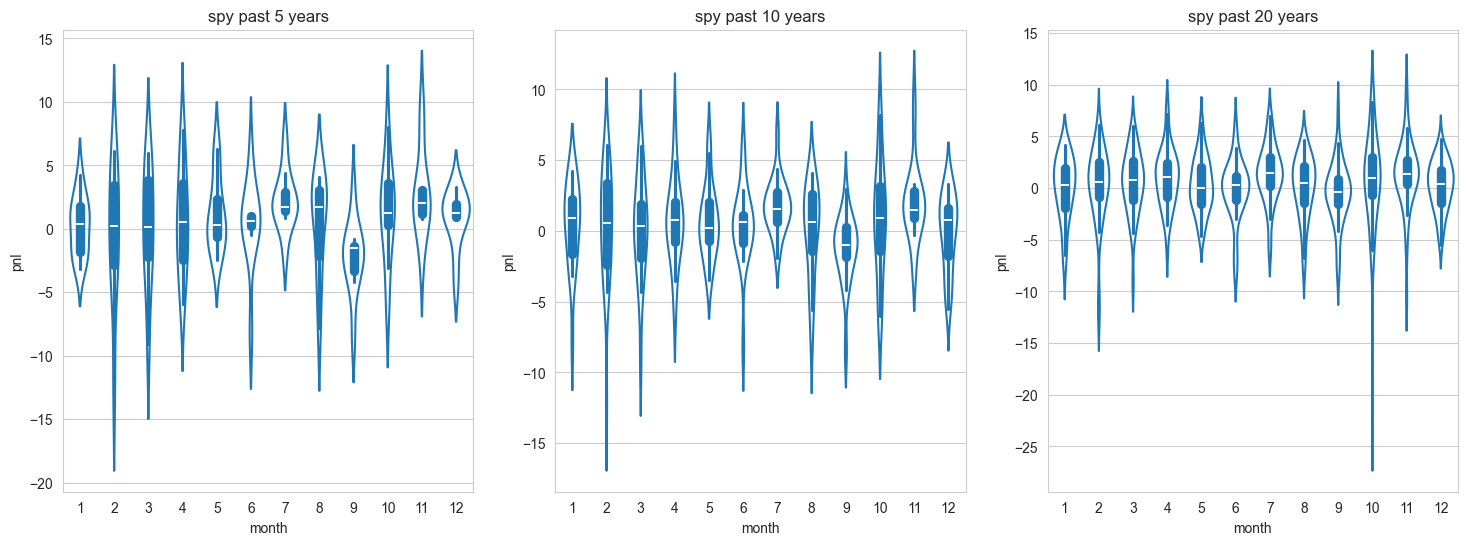

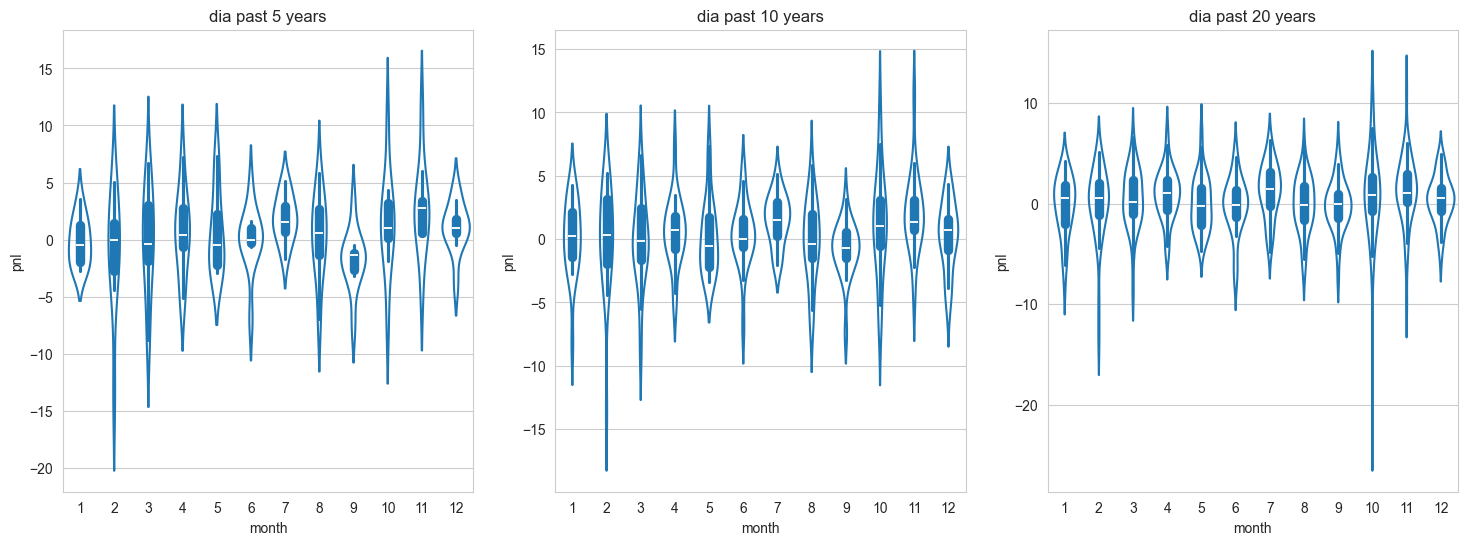

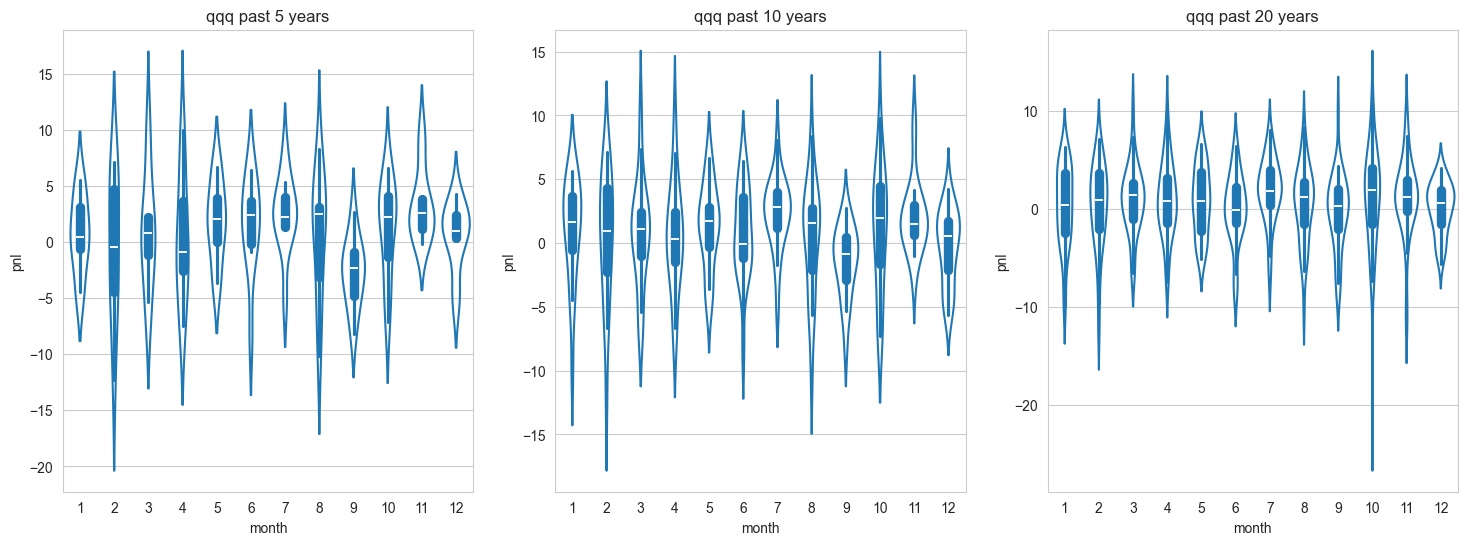

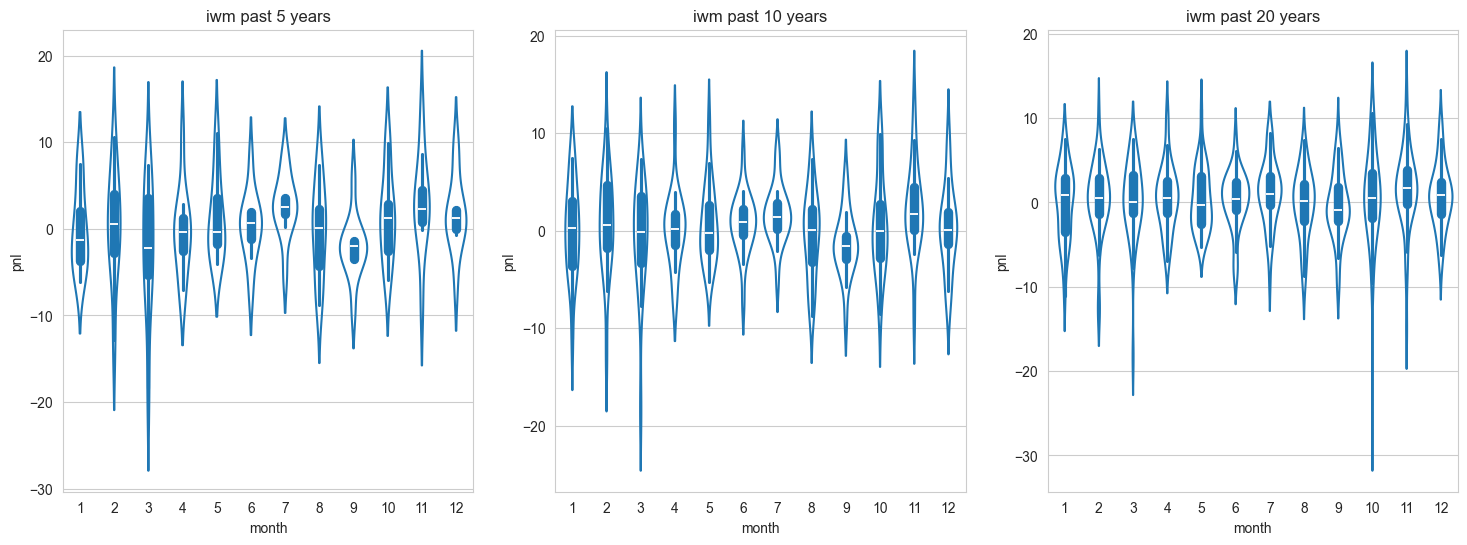

In [92]:
years = [5, 10, 20]

for idx, data in indexes_half_month.items():
    fig, axes = plt.subplots(1, len(years), figsize=(18, 6))
    for i, year in enumerate(years):
        sns.violinplot(ax=axes[i], 
                       data=data[-24 * year:], 
                       x="month", y="pnl",
                       fill=False)
        axes[i].set_title(f"{idx} past {year} years")
    plt.show()

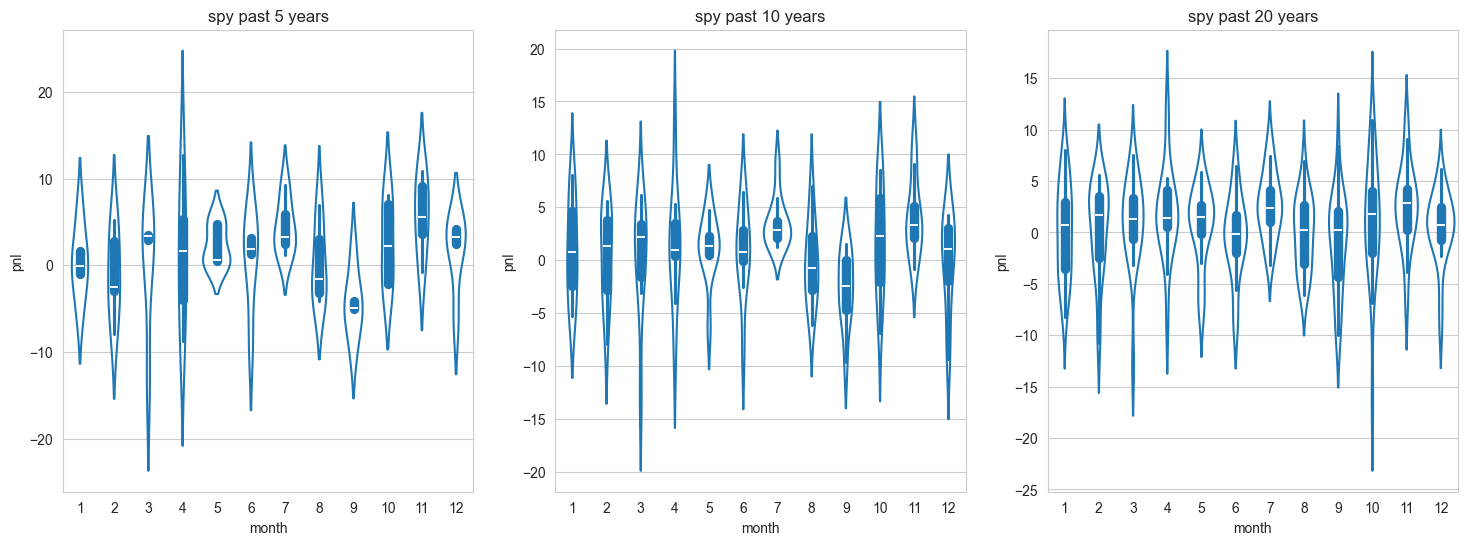

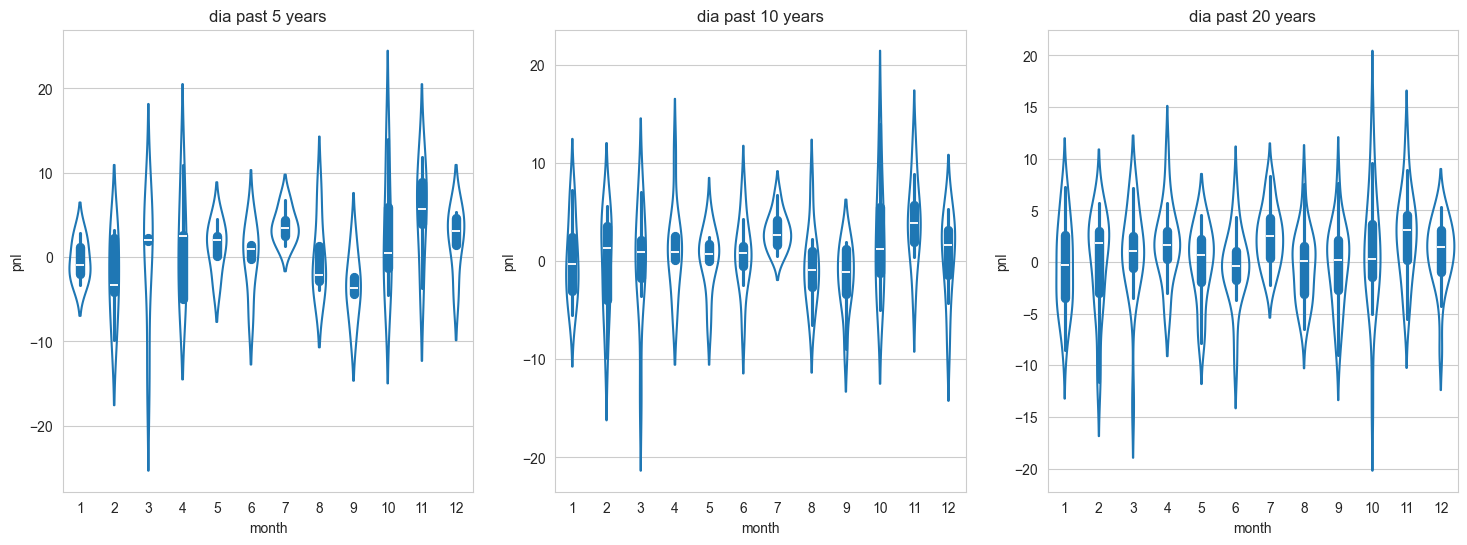

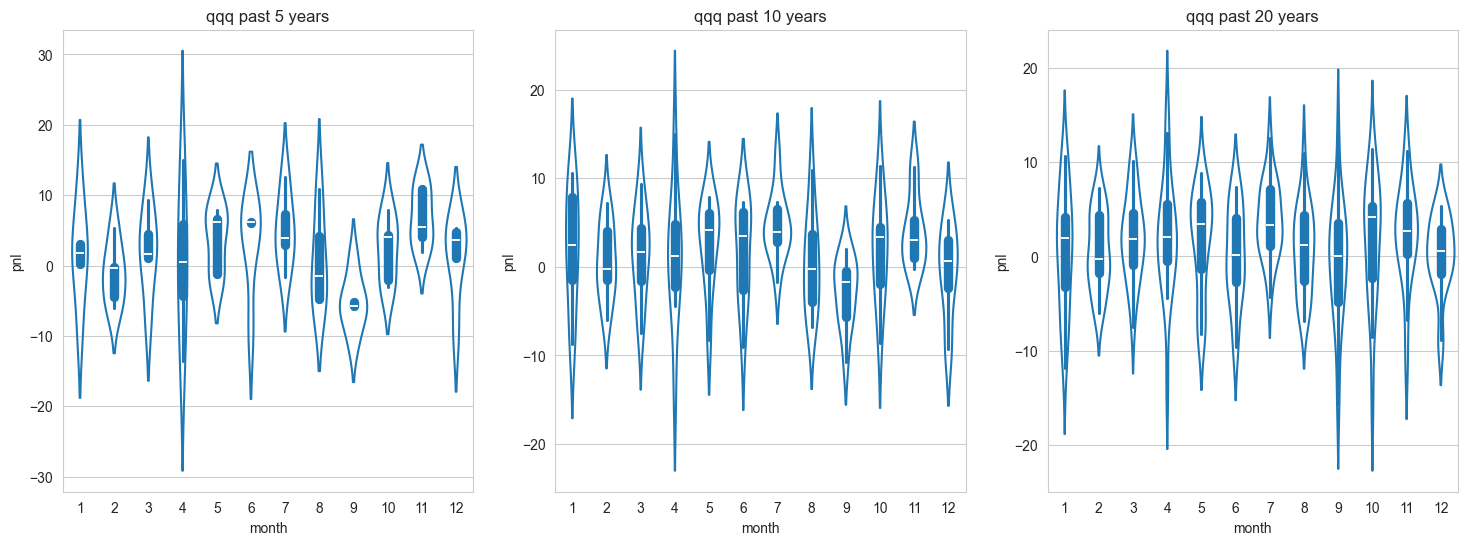

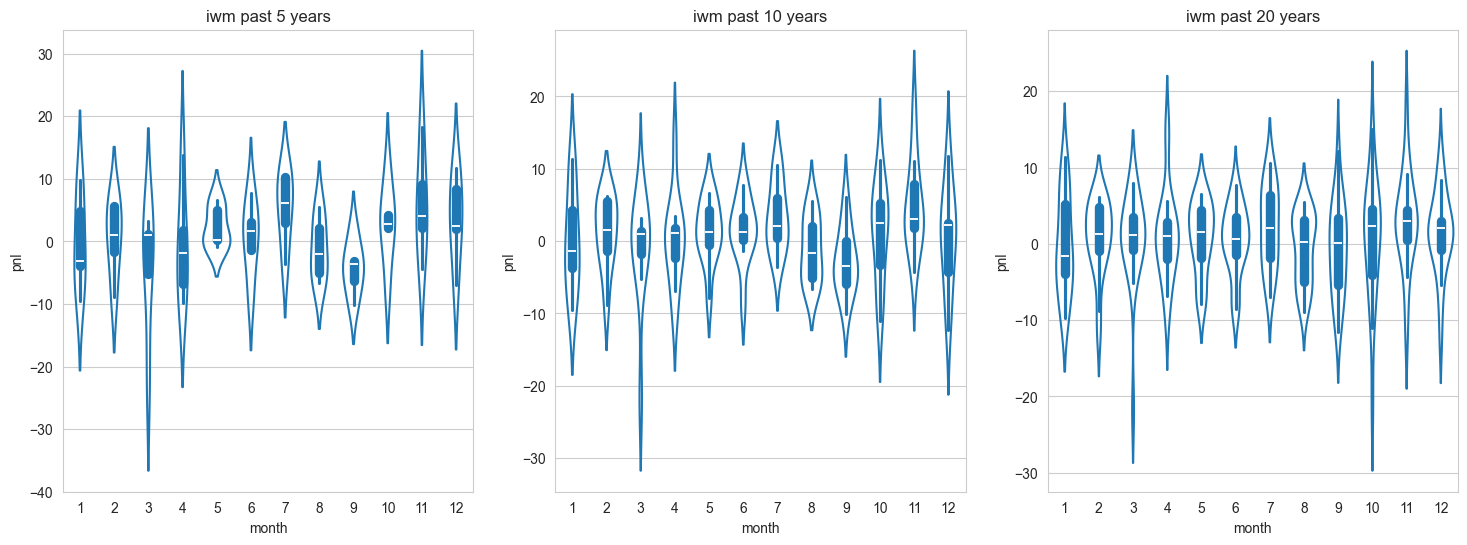

In [51]:
for idx, data in indexes_day.items():
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, year in enumerate([5, 10, 20]):
        sns.violinplot(ax=axes[i], data=data[-12 * year:], x="month", y="pnl", fill=False)
        axes[i].set_title(f"{idx} past {year} years")
    plt.show()


In [62]:
# sp500, dow, nasdaq, rus2000
indexes = ["spy", "dia", "qqq", "iwm"]
indexes_day = {}

for index in indexes:
    data = yf.download(index, period="2y", interval="1wk", progress=False)
    data["month"] = data.index.month
    data["pnl"] = data.Close.pct_change() * 100

    indexes_day[index] = data


In [63]:
indexes_day[index].tail(50)

,Open,High,Low,Close,Adj Close,Volume,month,pnl
Date,,,,,,,,
2023-08-21,184.699997,186.339996,181.610001,184.000000,181.502609,121167700,8,-0.352014
2023-08-28,184.839996,191.860001,184.570007,190.850006,188.259644,108892700,8,3.722829
2023-09-04,189.649994,189.899994,183.449997,183.919998,181.423706,96860200,9,-3.631128
2023-09-11,185.259995,186.070007,182.389999,183.610001,181.117905,126298500,9,-0.168550
2023-09-18,183.699997,183.759995,176.559998,176.669998,174.272095,125769500,9,-3.779752
2023-09-25,175.690002,179.160004,174.289993,176.740005,174.341171,158240500,9,0.039626
2023-10-02,176.330002,176.729996,169.089996,173.000000,171.452850,202874600,10,-2.116106
2023-10-09,171.839996,177.229996,169.690002,170.270004,168.747269,158320000,10,-1.578032
2023-10-16,171.740005,176.419998,166.429993,166.440002,164.951523,215267900,10,-2.249370
